In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
city_pay_df = pd.read_csv("./output_data/fiscal_2020.csv")

In [7]:
city_pay_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Fiscal Year', 'Payroll Number',
       'Agency Name', 'Last Name', 'First Name', 'Mid Init',
       'Agency Start Date', 'Work Location Borough', 'Title Description',
       'Leave Status as of June 30', 'Base Salary', 'Pay Basis',
       'Regular Hours', 'Regular Gross Paid', 'OT Hours', 'Total OT Paid',
       'Total Other Pay'],
      dtype='object')

In [8]:
fiscal_city_pay = city_pay_df.loc[city_pay_df['Fiscal Year'] == 2020]
fiscal_city_pay = fiscal_city_pay.loc[fiscal_city_pay['Leave Status as of June 30'] == 'ACTIVE']
fiscal_city_pay = fiscal_city_pay.loc[fiscal_city_pay['Regular Hours'] >= 1664]
fiscal_city_pay = fiscal_city_pay.loc[fiscal_city_pay['Regular Gross Paid'] >= 1664]
fiscal_city_pay = fiscal_city_pay.loc[fiscal_city_pay['Agency Name'] != 'DEPARTMENT FOR THE AGING']

fiscal_city_pay = fiscal_city_pay[['Fiscal Year',
       'Agency Name',
       'Agency Start Date', 'Work Location Borough', 'Title Description',
       'Leave Status as of June 30', 'Base Salary', 'Pay Basis',
       'Regular Hours', 'Regular Gross Paid']]
fiscal_city_pay.head()

,Fiscal Year,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid
0,2020,OFFICE OF EMERGENCY MANAGEMENT,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21
1,2020,OFFICE OF EMERGENCY MANAGEMENT,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21
2,2020,OFFICE OF EMERGENCY MANAGEMENT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21
3,2020,OFFICE OF EMERGENCY MANAGEMENT,03/18/2019,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,87900.95
4,2020,OFFICE OF EMERGENCY MANAGEMENT,05/15/2017,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,83976.54


In [9]:
fiscal_city_pay = fiscal_city_pay.sort_values(by='Regular Gross Paid', ascending=False)
fiscal_city_pay.tail(20)

,Fiscal Year,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid
40450,2020,POLICE DEPARTMENT,04/25/2018,BRONX,POLICE OFFICER,ACTIVE,45000.00,per Annum,2080.0,15571.67
81356,2020,DEPARTMENT OF CORRECTION,01/16/1996,QUEENS,*COOK,ACTIVE,41534.00,per Annum,2080.0,15530.60
72676,2020,HRA/DEPT OF SOCIAL SERVICES,03/23/2015,QUEENS,ELIGIBILITY SPECIALIST,ACTIVE,43410.00,per Annum,1820.0,15318.42
41733,2020,POLICE DEPARTMENT,10/24/2018,QUEENS,POLICE OFFICER,ACTIVE,45000.00,per Annum,2080.0,14678.94
321721,2020,NYC HOUSING AUTHORITY,09/11/2017,MANHATTAN,CARETAKER,ACTIVE,37434.00,per Annum,1736.3,14570.08
81382,2020,DEPARTMENT OF CORRECTION,02/17/2009,QUEENS,PLUMBER'S HELPER,ACTIVE,258.65,per Day,1750.0,13988.05
72748,2020,HRA/DEPT OF SOCIAL SERVICES,06/28/2010,BROOKLYN,CLERICAL ASSOCIATE,ACTIVE,37777.00,per Annum,1820.0,13897.10
274597,2020,HOUSING PRESERVATION & DVLPMNT,04/21/1986,MANHATTAN,CLERICAL ASSOCIATE,ACTIVE,49096.00,per Annum,1820.0,13692.68
72788,2020,HRA/DEPT OF SOCIAL SERVICES,11/14/2016,MANHATTAN,SPECIAL OFFICER,ACTIVE,35985.00,per Annum,2080.0,13341.47
284963,2020,DEPT OF ENVIRONMENT PROTECTION,05/14/2018,BROOKLYN,WATER USE INSPECTOR,ACTIVE,38216.00,per Annum,1820.0,13192.92


In [10]:
fiscal_city_pay = fiscal_city_pay.dropna()
fiscal_city_pay['Regular Gross Paid'].min()

2885.99

In [11]:
#fiscal_city_pay.to_csv("output_data/fiscal_2020.csv")
fiscal_city_pay['Regular Gross Paid'].max()

307146.05

In [12]:
plot_data = fiscal_city_pay.groupby('Agency Name')
plot_data

In [13]:
quartiles = fiscal_city_pay['Regular Gross Paid'].quantile([0.25,0.5,0.75])
quartiles

0.25    50069.80
0.50    73059.49
0.75    86923.20
Name: Regular Gross Paid, dtype: float64

In [14]:
outliers = []


lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of salary is: {lowerq}")
print(f"The upper quartile of salary is: {upperq}")
print(f"The interquartile range of salaries is: {iqr}")
print(f"The the median salary is: {quartiles[0.5]} ")
print(f"Salaries below {lower_bound} could be outliers.")
print(f"Salaries above {upper_bound} could be outliers.")

#for salary in salaries:
    
    

The lower quartile of salary is: 50069.8
The upper quartile of salary is: 86923.2
The interquartile range of salaries is: 36853.399999999994
The the median salary is: 73059.49 
Salaries below -5210.299999999988 could be outliers.
Salaries above 142203.3 could be outliers.


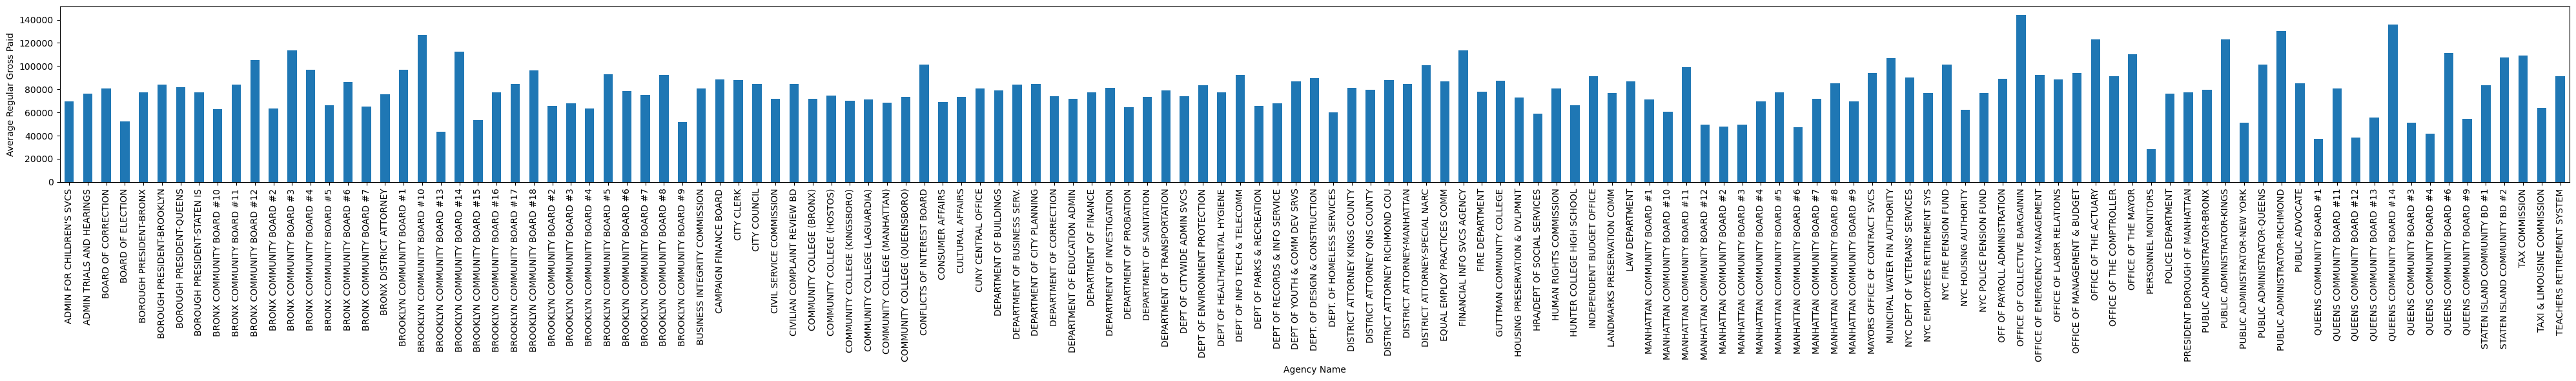

In [15]:
agency_pay = plot_data['Regular Gross Paid'].mean()
agency_pay
pay_chart = agency_pay.plot(kind='bar', figsize=(40,6))
pay_chart.set_xlabel('Agency Name')
pay_chart.set_ylabel('Average Regular Gross Paid')
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

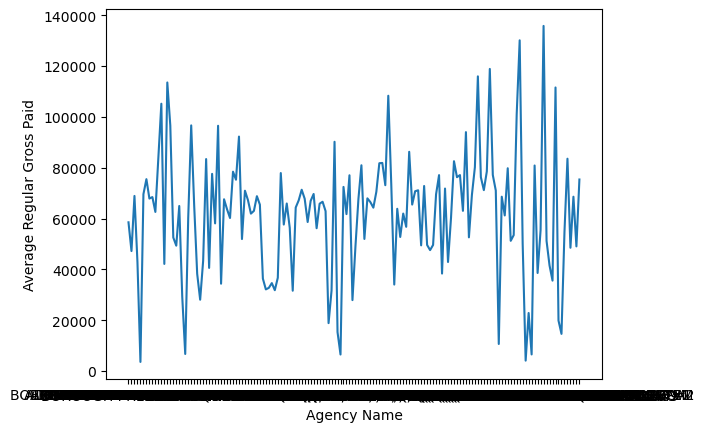

In [22]:
x_value = plot_data['Agency Name']
y_value = plot_data['Regular Gross Paid'].mean()

plt.plot(y_value)
plt.xlabel('Agency Name')
plt.ylabel('Average Regular Gross Paid')
plt.show